In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('/content/insurance.csv')


In [3]:
print("First 5 rows of the dataset:")
print(data.head())

First 5 rows of the dataset:
   age     sex   bmi  children smoker     region  expenses
0   19  female  27.9         0    yes  southwest  16884.92
1   18    male  33.8         1     no  southeast   1725.55
2   28    male  33.0         3     no  southeast   4449.46
3   33    male  22.7         0     no  northwest  21984.47
4   32    male  28.9         0     no  northwest   3866.86


In [4]:
print("\nData Info:")
print(data.info())



Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
None


In [5]:
print("\nSummary Statistics:")
print(data.describe())


Summary Statistics:
               age          bmi     children      expenses
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.665471     1.094918  13270.422414
std      14.049960     6.098382     1.205493  12110.011240
min      18.000000    16.000000     0.000000   1121.870000
25%      27.000000    26.300000     0.000000   4740.287500
50%      39.000000    30.400000     1.000000   9382.030000
75%      51.000000    34.700000     2.000000  16639.915000
max      64.000000    53.100000     5.000000  63770.430000


In [6]:
print("\nMissing Values:")
print(data.isnull().sum())


Missing Values:
age         0
sex         0
bmi         0
children    0
smoker      0
region      0
expenses    0
dtype: int64


In [8]:
categorical_features = ['sex', 'smoker', 'region']
for col in categorical_features:
    data[col] = data[col].astype('category')

In [9]:
print(data[col])

0       southwest
1       southeast
2       southeast
3       northwest
4       northwest
          ...    
1333    northwest
1334    northeast
1335    southeast
1336    southwest
1337    northwest
Name: region, Length: 1338, dtype: category
Categories (4, object): ['northeast', 'northwest', 'southeast', 'southwest']


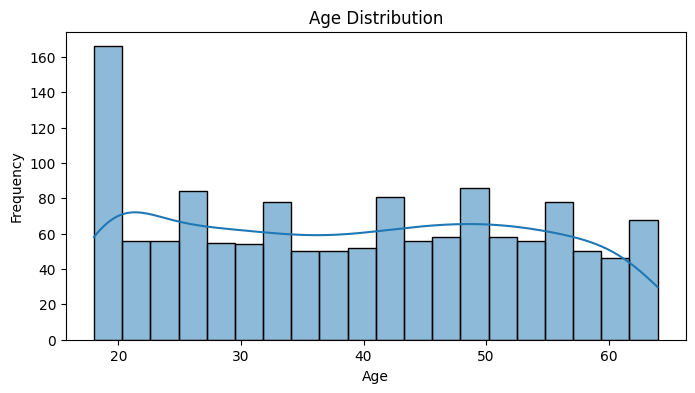

In [12]:
# Distribution of Age
plt.figure(figsize=(8, 4))
sns.histplot(data['age'], bins=20, kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

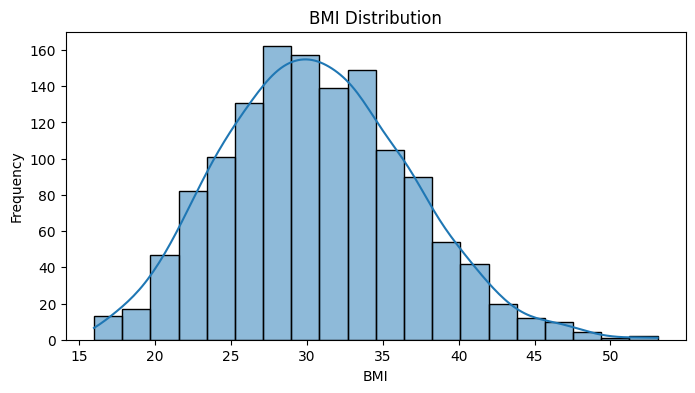

In [13]:
# Distribution of BMI
plt.figure(figsize=(8, 4))
sns.histplot(data['bmi'], bins=20, kde=True)
plt.title('BMI Distribution')
plt.xlabel('BMI')
plt.ylabel('Frequency')
plt.show()

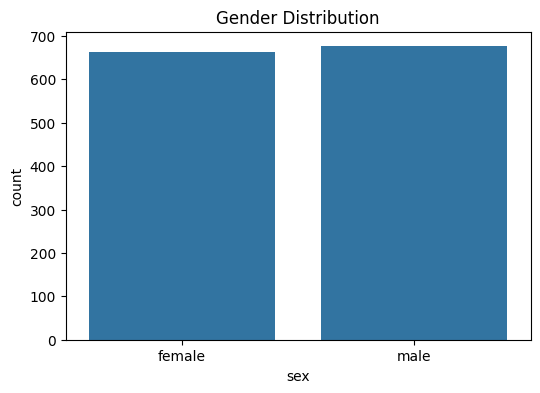

In [14]:
# Count plot for Sex
plt.figure(figsize=(6, 4))
sns.countplot(x='sex', data=data)
plt.title('Gender Distribution')
plt.show()

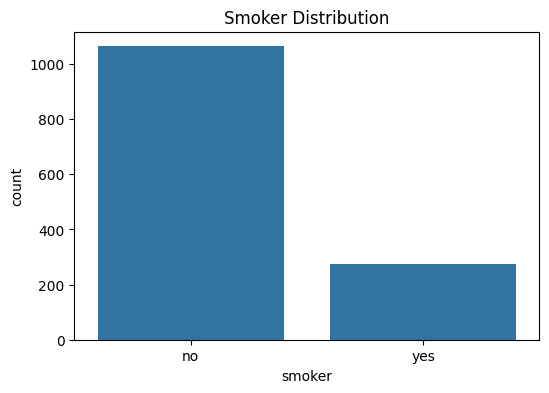

In [15]:
# Count plot for Smoker
plt.figure(figsize=(6, 4))
sns.countplot(x='smoker', data=data)
plt.title('Smoker Distribution')
plt.show()

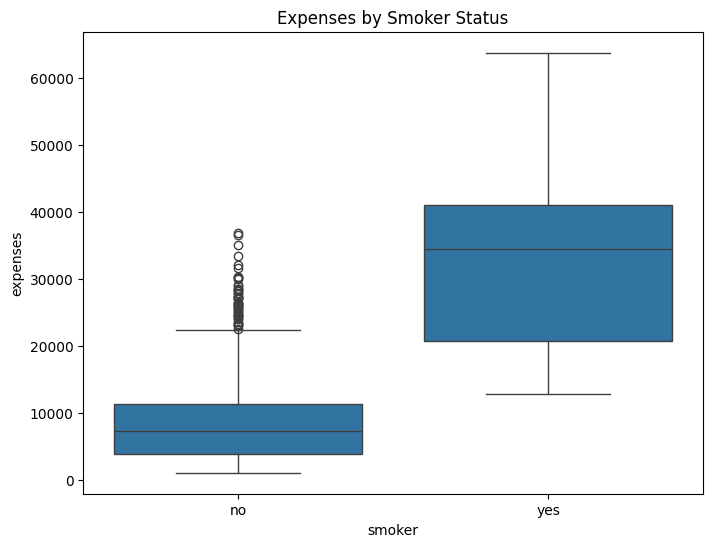

In [16]:
# Boxplot of expenses by smoker status
plt.figure(figsize=(8, 6))
sns.boxplot(x='smoker', y='expenses', data=data)
plt.title('Expenses by Smoker Status')
plt.show()

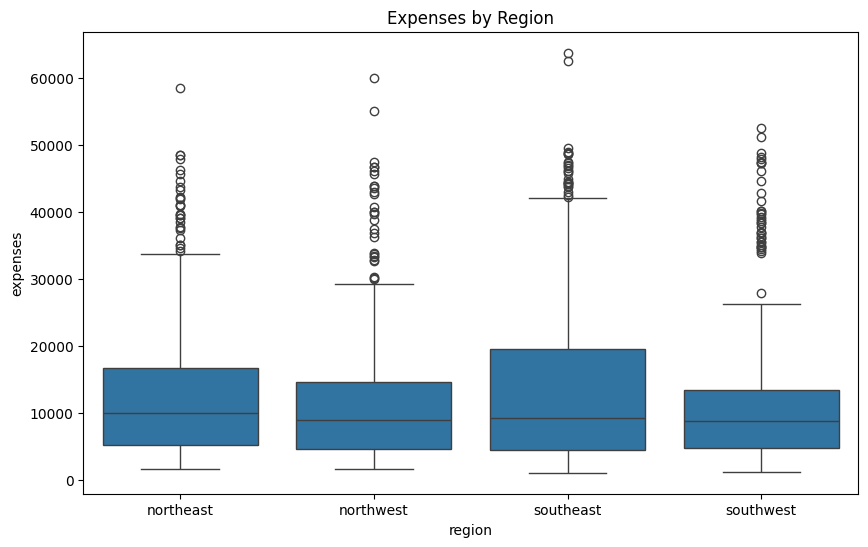

In [17]:
# Boxplot of expenses by region
plt.figure(figsize=(10, 6))
sns.boxplot(x='region', y='expenses', data=data)
plt.title('Expenses by Region')
plt.show()

In [21]:
# Correlation matrix (numeric features)
numeric_features = ['age', 'bmi', 'children', 'expenses']
corr_matrix = data[numeric_features].corr()


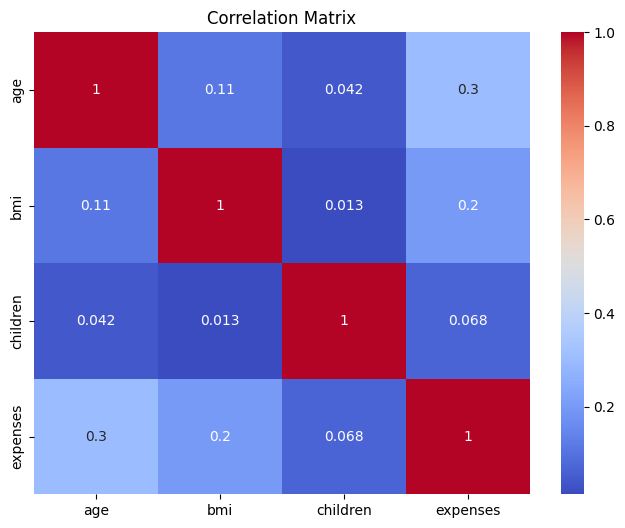

In [22]:
# Heatmap of correlations
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

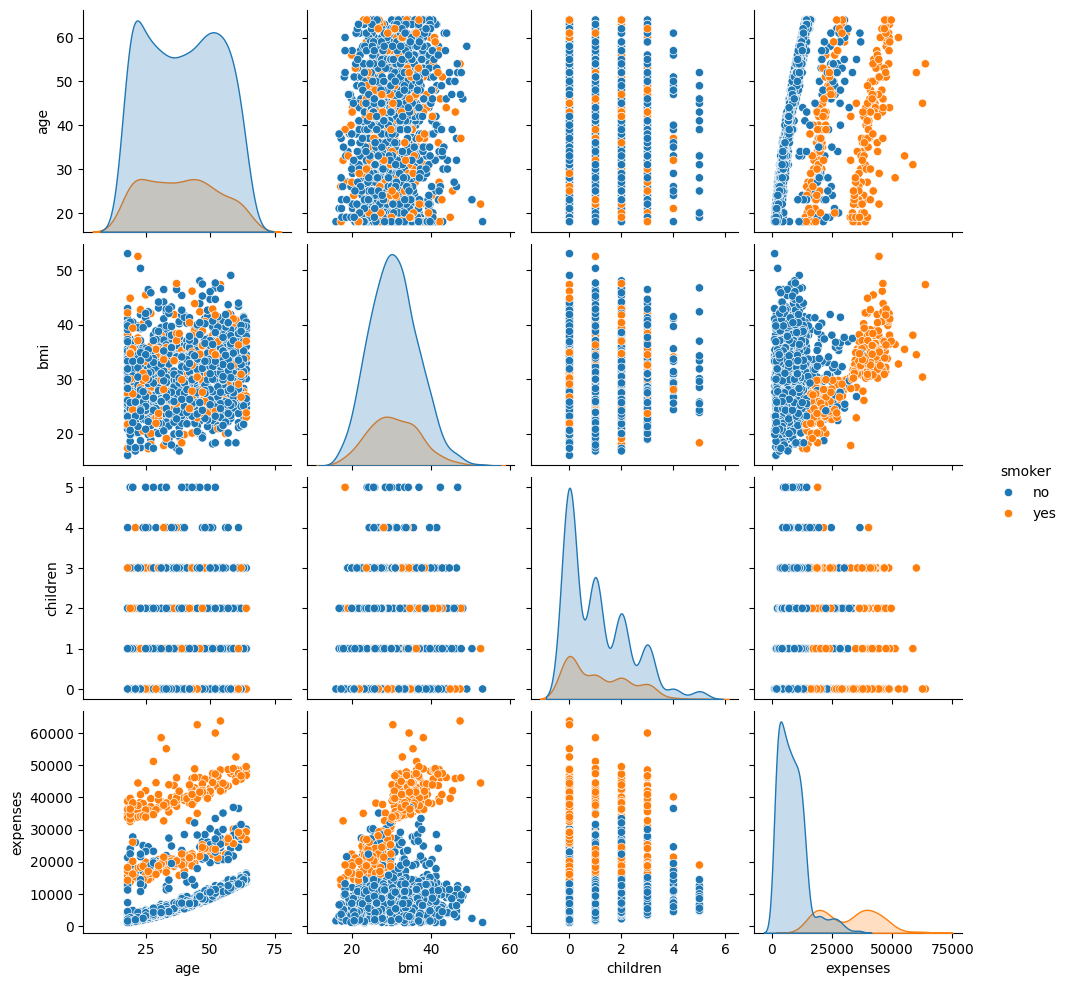

In [23]:
# Pairplot of numeric features colored by smoker status
sns.pairplot(data, vars=['age', 'bmi', 'children', 'expenses'], hue='smoker')
plt.show()

In [28]:
# Encode categorical variables for correlation analysis
data_encoded = data.copy()
data_encoded['sex'] = data_encoded['sex'].cat.codes
data_encoded['smoker'] = data_encoded['smoker'].cat.codes
region_dummies = pd.get_dummies(data_encoded['region'], prefix='region')
data_encoded = pd.concat([data_encoded, region_dummies], axis=1)
data_encoded = data_encoded.drop('region', axis=1) # Drop the original 'region' column

In [29]:
# Correlation with expenses
corr_with_expenses = data_encoded.corr()['expenses'].sort_values(ascending=False)
print("\nCorrelation with Expenses:")
print(corr_with_expenses)


Correlation with Expenses:
expenses            1.000000
smoker              0.787251
age                 0.299008
bmi                 0.198576
region_southeast    0.073982
children            0.067998
sex                 0.057292
region_northeast    0.006349
region_northwest   -0.039905
region_southwest   -0.043210
Name: expenses, dtype: float64
